## Module 1 Final Project Submission

* Student name: THOMAS WHIPPLE
* Student pace: PART TIME
* Scheduled project review date/time: FRIDAY, 10/18/2019, 12pm
* Instructor name: ABHINEET KULKARNI
* Blog post URL:


### The King County Housing Project

#### We begin by loading the data, looking at the contents, and start to clean it.

In [41]:
# Load the data set and check the header
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [42]:
# Get a look at the features, total entries, and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Detecting Missing Data

In [43]:
# First I need to look at columns 'yr_renovated' and 'waterfront' due to the NaN data.
# 'yr_renovated  17755' and 'waterfront  19221'
# The column 'view 21534' is also missing some information though it may be minimal.

In [44]:
# I also realized that 'date' and 'sqft_basement' contain objects!

In [45]:
# My first look for missing data is confirmed
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [46]:
missing_1 = 3842/21597
print("'yr_renovated' feature is missing about " + str(round(missing_1*100)) + " percent of the data.")

'yr_renovated' feature is missing about 18 percent of the data.


In [47]:
missing_2 = 2376/21597
print("'waterfront' feature is missing about " + str(round(missing_2*100)) + " percent of the data.")

'waterfront' feature is missing about 11 percent of the data.


In [48]:
# While both of these features are missing a lot of data, it doesn't constitute deleting the column.

In [49]:
# Use describe method to further look at the data.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
# Many of the columns have max/mins that probably include outliers.

### Which other columns or rows are hiding something?

#### Let's start with 'bedrooms' and look closer.

In [51]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [52]:
# Just in case this house is a mansion with 33 bedrooms, I wanted to look at the whole row.
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [53]:
# Looks as if the number was just entered incorrectly.  Should I delete it?  Change it to just '3'?

In [54]:
# I think it's just a typo, so I'll change it to the median.
data.at[15856,'bedrooms'] = 3

In [55]:
data.bedrooms.describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

#### I'm excited to see the variety of 'bathrooms' that houses might have.

In [56]:
# I guess some houses really do have a lot of bathrooms.
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [57]:
data.loc[data['bathrooms'] == 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [58]:
# Two houses with eight bathrooms or similar, meaning it's probably not an error but they are outliers. 

In [59]:
# Let's look at the number of houses with more than 4 standard deviations
data.bathrooms.std()*4 + data.bathrooms.mean()

5.191763458778315

In [60]:
# Drop all 'bathrooms' rows that are greater than '6'
data = data[data.bathrooms < 6]

#### What different kind of 'floors' do the houses have?

In [61]:
data.floors.unique()  

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [62]:
# Are floor levels continuous?
# Does 2.5 floors make sense?  I think I will just leave these as a continuous variable.

#### The 'id' feature is has really big numbers. 

In [63]:
data.id.unique() 

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157])

In [64]:
# Probably gonna just drop these since the number don't really mean anything.

#### Either you have 'waterfront' or you don't, right?

In [65]:
data.waterfront.unique()

array([nan,  0.,  1.])

In [66]:
# I think all the 'nan's should just become 0.  Either you have waterfront or you don't!

In [67]:
# Let's get rid of the Nan's, change them to '0'
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)

#### What is this 'view' all about?

In [68]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [69]:
# This is going to be tough! Is this continuous?  Are the nan's really 0's.

#### How many homes have a 'view' of 4, the max?

In [71]:
len(data.loc[data['view'] == 4])

312

In [72]:
# 312 homes feel as if their view is a "4".  Is that 4 stars?  4/4?  Definitely Categorical, should be binned!

In [73]:
# Let's fill them with '0'. Either you have a view or you don't!
data.view.fillna(value=data.view.median(), inplace = True)

#### What about that house with 13,540 sq. ft. of 'living space'?

In [74]:
data.loc[data['sqft_living'] == 13540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [75]:
# I guess it's just a big, expensive house.  Lots of bedrooms and bathrooms.  But is it an outlier still?

In [76]:
# What is three standard deviations from the mean?
data.sqft_living.std()*4 + data.sqft_living.mean()

5685.9601612088245

In [77]:
# How many houses fall outside of this?
len(data.loc[data["sqft_living"] > 5700])

85

In [78]:
data = data[data.sqft_living < 5700]

#### What is an average 'sqft_lot' size?

In [34]:
# About a third of an acre?
data.sqft_lot.mean()

14932.557572662272

In [35]:
# Three standard deviations.
data.sqft_lot.mean()*3

44797.67271798682

In [36]:
# Number of homes that have more than a 1 acre lot or 43560 sqft.
len(data.loc[data["sqft_lot"] > 45000])

994

In [ ]:
# Time to do some binning!  Maybe 0 - 1 acre, 1 - 3 and 3 - 6 acres?

#### Where can I find information on how King County 'grades' their homes?

In [29]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [30]:
# Can I bin these? Or maybe do some sort of Log Transformation to them closer to zero.

#### 'Basements'? Can I just say YES/NO to make it easier?

In [87]:
data.sqft_basement.nunique()

284

In [88]:
# After looking at .unique(), I see that there are lots of different basements, including "0" and 454 are "?"

In [89]:
# Let's just change them to '0'  - either you have a basement or not.
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = 0)

In [90]:
data.loc[data['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [92]:
data.sqft_basement.describe()

count     21495
unique      284
top         0.0
freq      12803
Name: sqft_basement, dtype: object

In [93]:
# Since 'basement' also came up as an 'object' I'm going to change them to floats, fill Nan's, and then bin them.
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [96]:
data.sqft_basement.describe()

count    21495.000000
mean       280.479972
std        428.300400
min          0.000000
25%          0.000000
50%          0.000000
75%        540.000000
max       2720.000000
Name: sqft_basement, dtype: float64

#### How important is 'sqft_above'?  Especially since I know the total?

In [33]:
# 'sqft_above' seems continuous.  Or is this number really just the total sqaure foot minus the basement?

In [34]:
# Also, is this features going to effect the multicollinearity?

#### What does the 'condition' feature look like?

In [35]:
data.condition.unique()

array([3, 5, 4, 1, 2])

In [ ]:
# Should I consider binning these? Most of them are '3'.  Seems like it's a categorical feature.

#### Neighboring 'living size' has entries way beyond the 3 standard deviations.

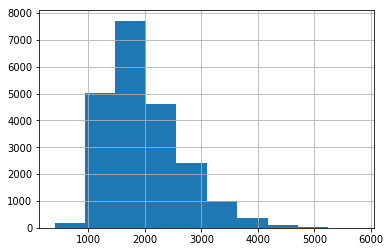

In [97]:
# Let's look at the right skewed histogram.
data.sqft_living15.hist()

In [100]:
# Again, using 4 standard deviations to predict outliers
data.sqft_living15.mean()+data.sqft_living15.std()*4

4614.548709604388

In [101]:
# There's not that many.
len(data.loc[data["sqft_living15"] > 4600])

15

In [102]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 4600]

#### Neighboring 'lot size' has a bunch of big values.

In [107]:
# Let's do the same here.
data.sqft_lot15.mean()+data.sqft_lot15.std()*4

58097.963526446045

In [108]:
len(data.loc[data["sqft_lot15"] > 121120])

0

In [109]:
# Let's get rid of the outliers
data = data[data.sqft_lot15 < 121120]

In [38]:
# These numbers seem continuous, especially if you speak square footage.
# Also, are these related to zipcode?  Usually neighborhoods have similar sized houses!

#### Still have to deal with zipcode, lat, and long

In [39]:
# 'zipcode' is somehow related to 'lat' and 'long'!

#### The 'yr_built' feature seems pretty standard. But is it continuous?

In [40]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [41]:
# Perhaps I can do something with these numbers to even them out. Log transform?

#### The 'year renovated' is certainly going to be more difficult.

In [79]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [80]:
# Some how I have to deal with these. Most of them have not been renovated.  Some are 'Nan'. 
# Can I bin them into a few groups - recently renovated, renovated a while ago, and not at all?

In [81]:
# Let's fill in the "Nan's" with 0.
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

#### So I tried to run just a simple model on all the data, before processing - and I realized that I hadn't looked at the feature "date".

In [82]:
# Not sure what to do but I'm especially confused by the fact that is says, "object"
data.date.describe()

count         21495
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

In [83]:
# I'll try to change them to something different, perhaps a float.
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [84]:
data.date.describe()

count     21495.000000
mean     735535.315608
std         113.102396
min      735355.000000
25%      735436.000000
50%      735522.000000
75%      735646.000000
max      735745.000000
Name: date, dtype: float64

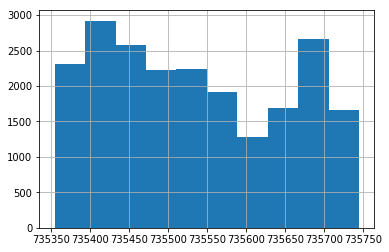

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
data.date.hist()

#### Thought I would check for duplicates.

In [46]:
duplicates = data[data.duplicated(subset='id')]
print(len(duplicates))


177


In [47]:
# So I check duplicates of the 'id' and it shows that 177 of the homes are  repeats.
# This is probably because they were sold more than once.  
# First, it's a really small number. 
# Second, all the info is there and the price/date changed. So it's essentially a different house

#### Here I just wanted to look at value counts for all features to see if I'm missing anything.  But it's only the top 5 percents, so I might need to look at some of them individually.

In [48]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

#### Then I tried a histogram plot

In [ ]:
#data.hist(figsize  = [12, 12]);

In [53]:
# First I noticed that not all the graphs are there.

#### I also wanted to try a scatter matrix to look for continuous and non-continuous variables

In [49]:
#pd.plotting.scatter_matrix(data, figsize=(12,12));
# This take a long time but it helped me determine which ones are continuous and with are more categorical.

## Multicollinearity of Features

In [50]:
# Here I used the correlation matrix
#data.corr()

In [1]:
# Here I looked at the same with the correlation set to .75
abs(data.corr()) > 0.75

NameError: name 'data' is not defined

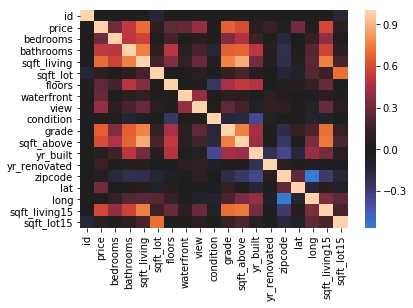

In [54]:
import seaborn as sns
sns.heatmap(data.corr(), center=0);

Looking at this heat map I can see that there are a couple of features that may cause multicollinearity. In particular 'sqft_above' and 'grade'.

In [6]:
import matplotlib as plt
data.plot('lat', 'long')